# MS 263 Data Analysis Final Project

#### Import packages

In [1]:
import pandas as pd
import numpy as np
from make_pca import make_pca
from make_plots import make_plots
from create_datasets import create_datasets
from mean_maker import mean_maker
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import maptools
import cartopy.crs as ccrs

#### Read in Data

In [2]:
df = pd.read_csv("alltransects.csv")

#set reef condition values
conditions = [(df['transect'] == 1) | (df['transect'] == 2) | (df['transect'] == 3) | (df['transect'] == 6),
(df['transect'] == 4) | (df['transect'] == 5) | (df['transect'] == 8), (df['transect'] == 9) | (df['transect'] == 7)]
values = ['on', 'off', 'cross']
df['reef'] = np.select(conditions, values)

## Introduction

In November and December of 2014, Dr. Amanda Kahn and colleagues executed a series of ROV dives located west of Vancouver, BC in the Strait of Georgia over the Fraser Ridge Reef (Fig. 1). This location was of specific interest because it is the home to a glass sponge reef. Glass sponges are a class of sponges that are made of four- and six-sided spicules made of silica. They are extremely fragile and the only known reefs exist off the coast of British Columbia and Washington. Prior to their discovery in 1987, sponge reefs were thought to have gone extinct during the Jurassic period (Conway et al., 1991). Sponges are filter feeders and their presence in dense numbers acts to slow currents in the water column. This causes sediment to fall out of the water column and build up around the reef, providing habitat and protection for marine organisms (Krautter et al., 2006). Because of their importance and rarity, Dr. Kahn was curious how the water quality above these reefs changes compared to the water surrounding the reefs. Sponges intake water through the ostia located throughout their body and expel it vertically through the osculum after filtering out food. As a product of this process, the water above sponge reefs is likely to differ in its characteristics from water that is not filtered. Because of the importance of sponge reefs for other organisms, knowing the quality of the water above the reef can have implications for species health and composition. 

In order to answer the question of whether or not oxygen content differs over glass sponge reefs, data from the ROV dives mentioned above can be compared, since some of the  transects followed were over glass sponge reefs while others were not. The ROV dives output three different sets of data. There were dive annotations, which gave qualitative observations along with specific times, latitudes, longitudes, and depths at which these observations occurred. CTD data was also collected giving a specific date, time, and depth as well as water temperature, salinity, oxygen concentration, and pressure. Finally, navigation data from the ROV was also recorded, giving specific information regarding date, time, depth, latitude, longitude, and various ROV velocity and heading data. The navigation data recorded five observations per second, the CTD data recorded one observation per second, and the dive annotations were done qualitatively whenever something of note happened during the dive. In total, nine transects were executed over seven dives. 


/opt/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


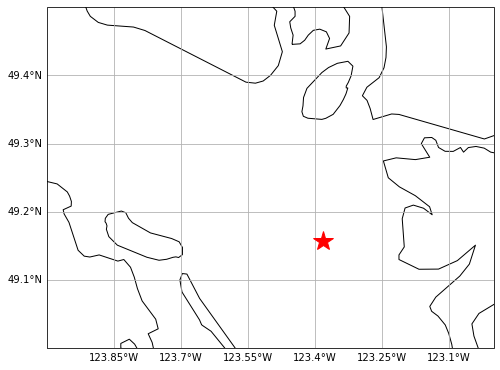

In [3]:
#set extent and make map for wide-view map of reef
extent_wide = [-124, -123, 49, 49.5]
plt.figure(figsize = (8,8))
ax = maptools.make_map(ccrs.Mercator())
ax.set_extent(extent_wide)
ax.coastlines('10m')
plt.plot(df['longitude'][0], df['latitude'][0], 'r*', ms = 20, transform = ccrs.PlateCarree())
plt.show()

##### Figure 1. A Map of the Georgia Strait between Vancouver Island (west) and the British Columbia mainland (east). The red star indicates the location of the Fraser Ridge Glass Sponge Reef where the transects were taken.

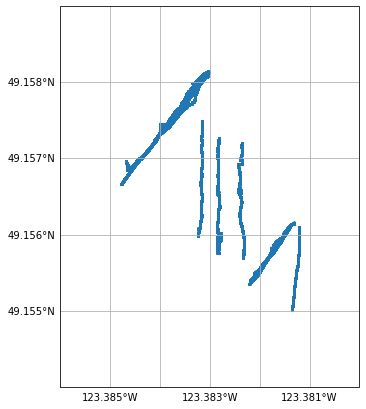

In [4]:
#set extent and make transect map
extent_zoom = [-123.386, -123.38, 49.154, 49.159]
plt.figure(figsize = (7,7))
ax = maptools.make_map(ccrs.Mercator())
ax.set_extent(extent_zoom)
ax.coastlines('10m')
plt.scatter(df['longitude'], df['latitude'], transform = ccrs.PlateCarree(), s=3)
plt.show()

##### Figure 2. A zoomed in map showing the nine transects on and around the sponge reef. Note that a few of the transects are nearby, making them appear as one continuous line. 

# Methods

Transects were conducted using an ROV and SeaBird CTD during November and December of 2014 in the Georgia Strait between mainland British Columbia and Vancouver Island. Nine transects Transects 1, 2, 3, and 6 were above a glass sponge reef, transects 4, 5, and 8 were above sediment surrounding the reef (non-reef), and transects 7 and 9 were cross-reef transects partially going over a glass sponge reef (Fig. 2). After data was collected, there were two datasets, one with CTD data (temperature, oxygen, salinity), and one with navigation data (latitude, longitude, depth, range to bottom). In order to compare environmental variables at different locations, it was necessary to combine these datasets. This was done using the timestamp that was provided in both datasets. Using SQL, the datasets were linked so any given location had an associated set of CTD measurements. 

After the data was in one dataset for analysis, I first focused on visualization. My goal was to have transect distance on the x-axis, height above the seafloor on the y-axis, and oxygen as a continuous color variable that was interpolated beyond the data points collected. In order to transform latitude and longitude to transect distance, the physoce.util.haversine() function was used (Connolly, 2018) along with a for loop that looped through the data observations. After this, the original data plot from Figure 3 was able to be created. The next step was interpolation so that a complete vertical profile above/below any given transect would be able to be visualized. In class, we learned about a few different interpolation techniques. I attempted to use linear, cubic spline, and optimal interpolation (kriging). The former two interpolation techniques were available in the scipy.interpolate.griddata() module (Virtanen et al., 2020). However, kriging is not easily implemented in Python (discussed in future work and limitations section). Using this module, I was able to create interpolations for each transect and put them into figures (Fig. 3).

In order to quantatively asses the results of the data collected, I ran a principal component analysis on the three environmental variables. I also constructed a group of generalized linear models to asses the relative importance of each variable (temperature, salinity, depth, on/off/cross reef) in predicting oxygen content. One of the assumptions of linear models is that each observation is independent. With a spatial dataset such as this, each observation within a transect is not independent. To remedy this, I simply averaged each variable over the entire transect and treated each average as independent observation with why I ran the models on. The combinations of models ran can be seen in Table 1. 

In addition to generalized linear models, I also ran a PCA on the three environmental variables that the CTD collected in order to determine which variables described most of the variance in the environmental variable (Fig. 4)

All data analysis was done in Python using the packages numpy (Harris et al., 2020), scipy (Virtanen et al., 2020), statsmodels (Seabold & Perktold, 2010), and pandas (McKinney, 2010). All figures were made using matplotlib (Hunter, 2007). 

##### Table 1. Models run and associated statistics. The model highlighted in green is what I determined to be the best model to fit to the data. Oxygen was the response variable in all cases.

![](model_table.png)

# Results

### Make subsets and figures for each transect

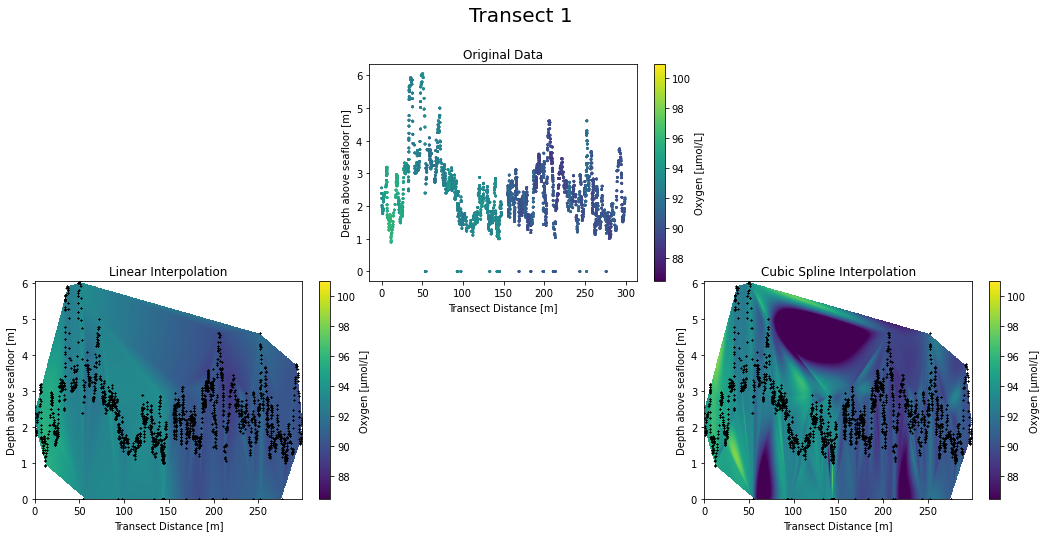

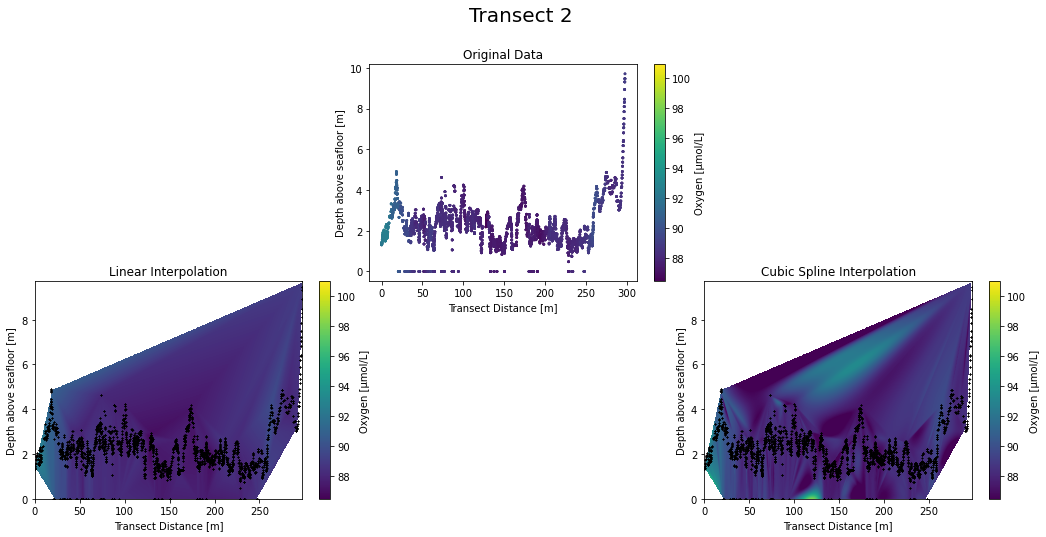

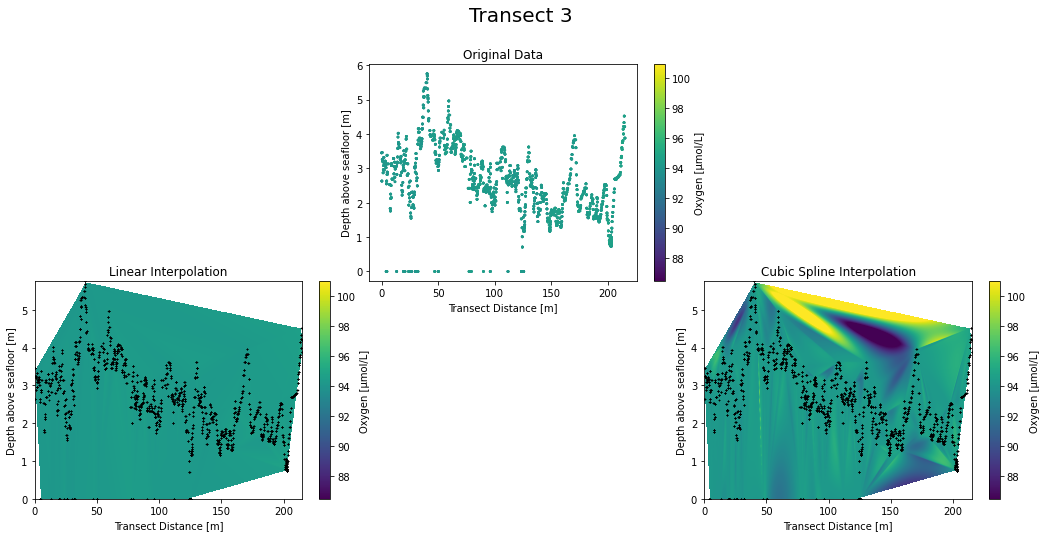

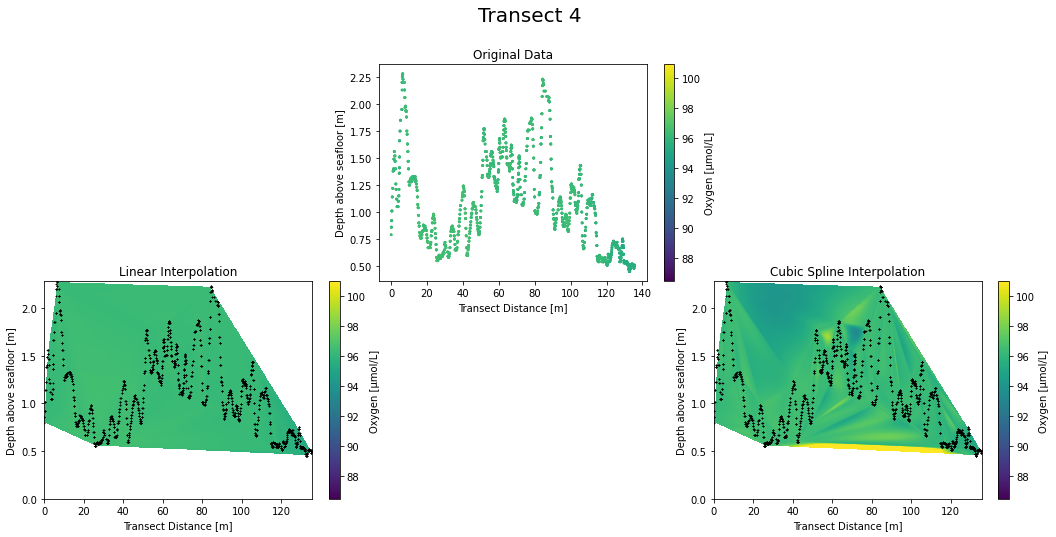

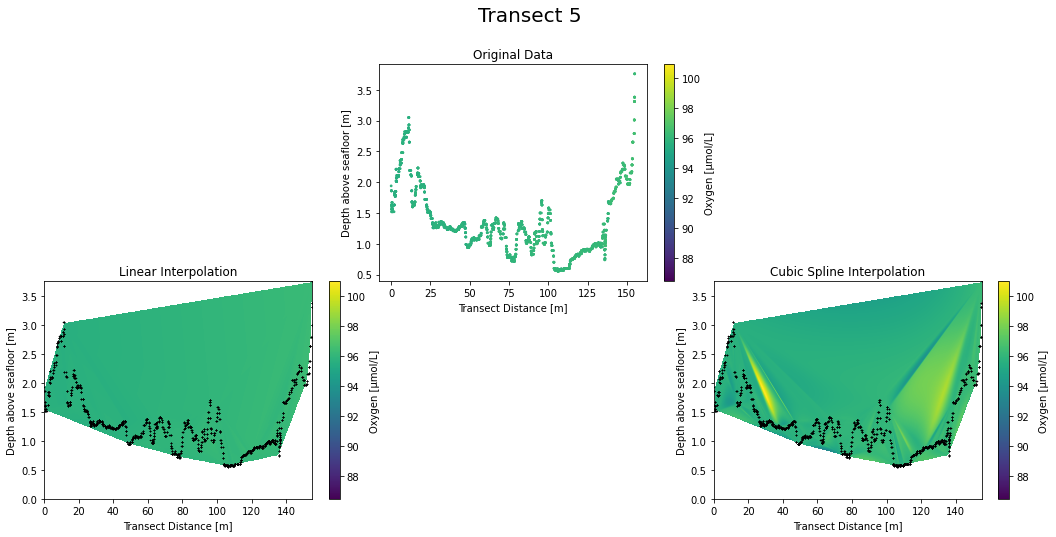

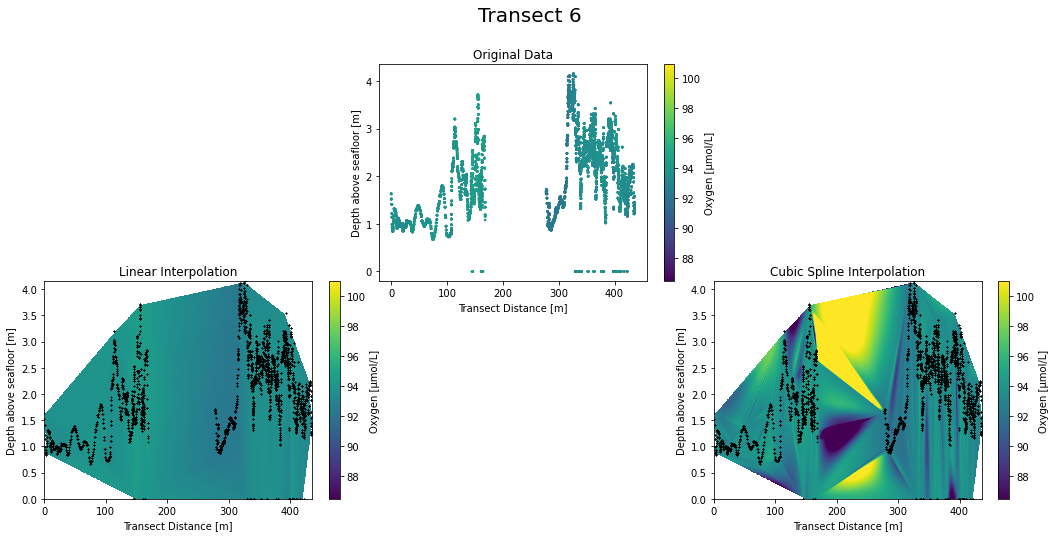

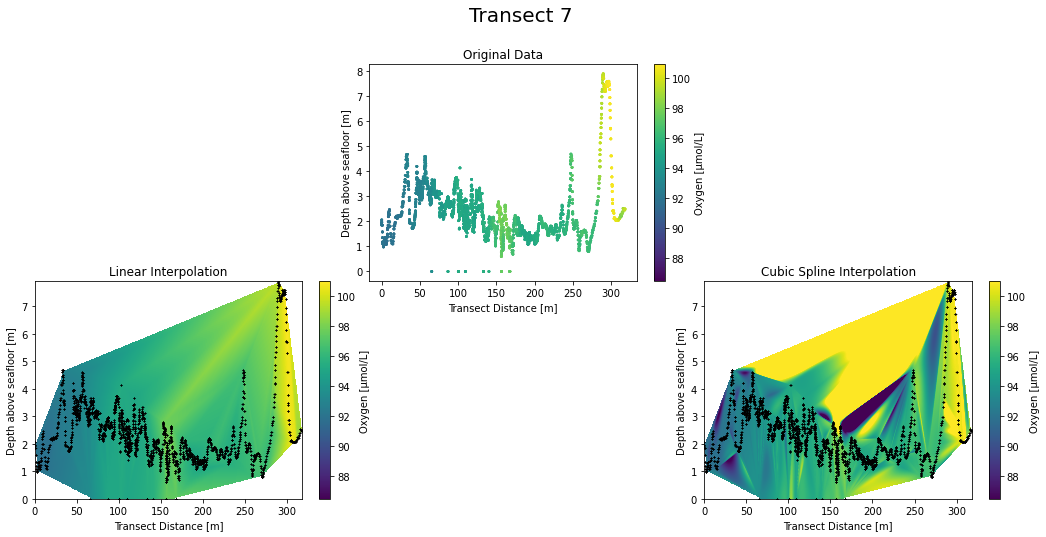

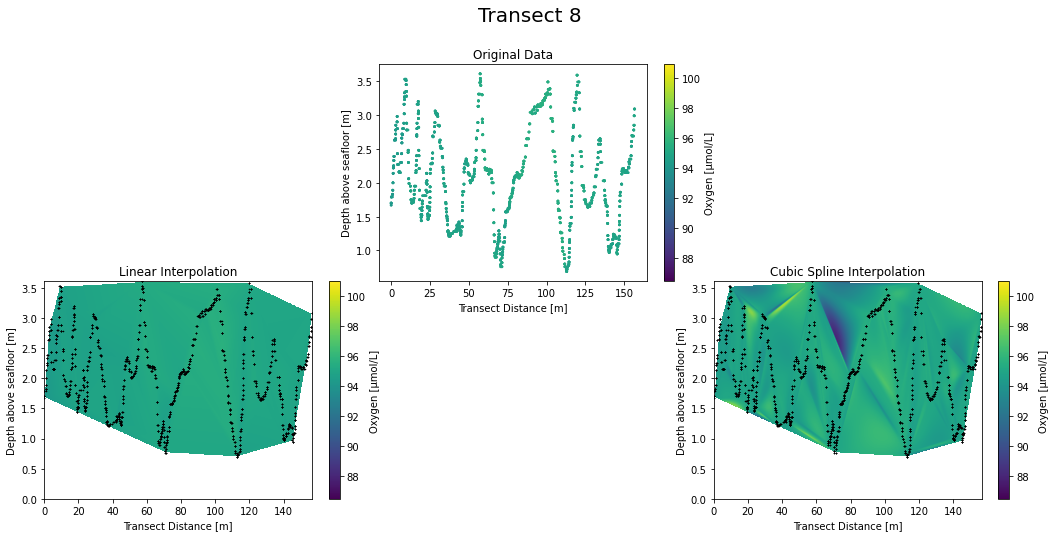

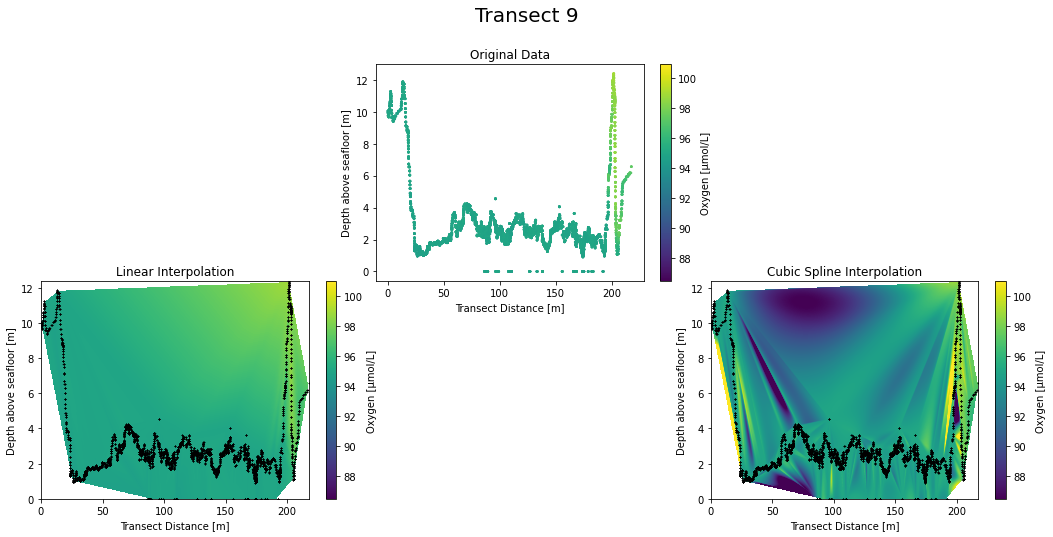

In [5]:
#loop through the transect numbers, making the subset, interpolation, and graphing it
for i in np.unique(df['transect']):
    transect_sub, oxy_interp_linear, oxy_interp_cubic, min_oxy, max_oxy = create_datasets(df, i, 'oxygen') #makes subset, interpolations
    make_plots(transect_sub, oxy_interp_linear, oxy_interp_cubic, i, 'oxygen', min_oxy, max_oxy) #graphs interpolations

##### Figure 3. Raw oxygen data, linear interpolation, and cubic spline interpolation for all nine transects. Note that oxygen axis set constant for all transects, so variation may not seem to exist, but does on a small scale. 

## PCA

Eigenvalues: [2.52210602 0.44185003 0.03604395]
Eigenvectors: 
 [[-0.57691993  0.57997967 -0.57514084]
 [ 0.61982411 -0.14772642 -0.7707107 ]
 [ 0.53196003  0.80112452  0.27425906]]
Variance accounted for by PC1: 84.0702005027903 %
Variance accounted for by PC2: 14.728334433655284 %


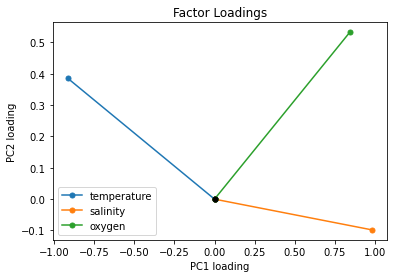

In [6]:
from make_pca import make_pca
make_pca(df, ['temp', 'salinity', 'oxygen'])

##### Figure 4. PCA factor loadings of the three environmental variables taken using the CTD over all transects.

## Generalized Linear Models

In order to ensure that each observation was independent prior to model fitting, I averaged each transect's oxygen content and water depth into a new data frame. 

In [7]:
oxy_means, temp_means, sal_means, depth_means, reef_means, transect_list = [], [], [], [], [], []
for i in np.unique(df['transect']):
    transect_sub, oxy_interp_linear, oxy_interp_cubic, min_oxy, max_oxy = create_datasets(df, i, 'oxygen')
    mean_maker(transect_sub, i, oxy_means, temp_means, sal_means, depth_means, reef_means, transect_list)
df_means = pd.DataFrame(list(zip(transect_list, oxy_means, temp_means, sal_means, depth_means, reef_means)), \
                        columns = ['transect', 'oxygen', 'temp', 'salinity', 'depth', 'reef'])

In [8]:
df_means

,transect,oxygen,temp,salinity,depth,reef
0,1,91.775246,9.884354,30.579077,169.153530,['on']
1,2,88.357461,9.862373,30.585515,167.347310,['on']
2,3,94.363929,9.764069,30.987040,166.579668,['on']
3,4,96.226202,9.695069,31.105670,165.322894,['off']
4,5,95.949277,9.674008,31.108254,167.908304,['off']
5,6,93.585514,9.647322,31.096673,168.043915,['on']
6,7,95.418650,9.733173,31.037717,167.207926,['cross']
7,8,94.971295,9.717813,31.050170,169.487428,['off']
8,9,95.215356,9.714794,31.050338,170.906018,['cross']


I calculated many models, but below are the summaries for the three best-fit models:

### Oxygen ~ Reef Condition + Salinity + Depth + Temperature

In [9]:
model_all = smf.ols('oxygen ~ 1 + reef + salinity + depth + temp', data = df_means).fit()
model_all.summary()

/opt/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oxygen   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     5.599
Date:                Tue, 25 May 2021   Prob (F-statistic):             0.0935
Time:                        23:37:33   Log-Likelihood:                -10.004
No. Observations:                   9   AIC:                             32.01
Df Residuals:                       3   BIC:                             33.19
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -847.9004    528.525     -1.604      0.207   -2529.902     834.101
reef[T.['off']]     0.5305      1.300      0.408      0.711      -3.606       4.667
reef[T.['on']]     -0.4917      1.547     -0.318      0.771      -5.415       4.431
salinity           20.2116      9.429      2.144      0.121      -9.796      50.220
depth               0.1015      0.311      0.326      0.766      -0.890       1.093
temp               30.7088     22.796      1.347      0.271     -41.839     103.256
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.030
Skew:                           0.070   Prob(JB):                        0.985
Kurtosis:                       2.756   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Oxygen ~ Salinity

In [10]:
model_sal = smf.ols('oxygen ~ 1 + salinity', data = df_means).fit()
model_sal.summary()

/opt/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oxygen   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     26.32
Date:                Tue, 25 May 2021   Prob (F-statistic):            0.00135
Time:                        23:37:33   Log-Likelihood:                -13.491
No. Observations:                   9   AIC:                             30.98
Df Residuals:                       7   BIC:                             31.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -226.6881     62.503     -3.627      0.008    -374.485     -78.891
salinity      10.3591      2.019      5.131      0.001       5.585      15.134
==============================================================================
Omnibus:                        1.140   Durbin-Watson:                   2.598
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                0.624
Skew:                          -0.593   Prob(JB):                        0.732
Kurtosis:                       2.491   Cond. No.                     4.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Oxygen ~ Salinity + Reef Condition

In [11]:

model_reefsal = smf.ols('oxygen ~ 1 + reef + salinity', data = df_means).fit()
model_reefsal.summary()

/opt/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oxygen   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     9.047
Date:                Tue, 25 May 2021   Prob (F-statistic):             0.0183
Time:                        23:37:33   Log-Likelihood:                -12.139
No. Observations:                   9   AIC:                             32.28
Df Residuals:                       5   BIC:                             33.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -156.9129     82.887     -1.893      0.117    -369.980      56.154
reef[T.['off']]     0.0411      1.148      0.036      0.973      -2.909       2.992
reef[T.['on']]     -1.4119      1.248     -1.132      0.309      -4.619       1.795
salinity            8.1249      2.670      3.043      0.029       1.262      14.988
==============================================================================
Omnibus:                        0.707   Durbin-Watson:                   2.797
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.050
Skew:                          -0.171   Prob(JB):                        0.975
Kurtosis:                       2.867   Cond. No.                     6.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After selecting a model with salinity and reef condition as the best fit, I then plotted the residuals to analyze trends. 

Text(0, 0.5, 'Residuals')

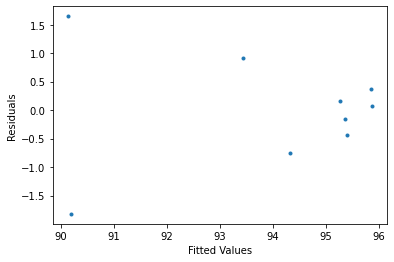

In [12]:
fv = model_reefsal.fittedvalues
resid = model_reefsal.resid
plt.figure()
plt.plot(fv, resid, '.')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

In [13]:
model_colin = smf.ols('salinity ~ 1 + reef', data = df_means).fit()
model_colin.summary()

/opt/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               salinity   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     2.059
Date:                Tue, 25 May 2021   Prob (F-statistic):              0.208
Time:                        23:37:33   Log-Likelihood:                 3.9417
No. Observations:                   9   AIC:                            -1.883
Df Residuals:                       6   BIC:                            -1.292
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          31.0440      0.135    229.557      0.000      30.713      31.375
reef[T.['off']]     0.0440      0.175      0.252      0.809      -0.383       0.471
reef[T.['on']]     -0.2320      0.166     -1.400      0.211      -0.637       0.173
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.137
Skew:                           0.119   Prob(JB):                        0.934
Kurtosis:                       2.445   Cond. No.                         4.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusions

Qualitatively, It can be seen that the linear interpolations of the on-reef transects (transects 1, 2, 3, and 6) have lower oxygen content than those that are off the reef (transects 4, 5, and 8). Based on the models, it is clear that reef condition (on/off/cross) is a significant predictor of oxygen content. Despite the fact that the salinity only model has the lowest AIC (30.98) and p-value (0.001), one of the models including the reef as a predictor have significant (< 0.05) p-values, and both have better fits (R^2) and not a significantly higher AIC (assuming that an AIC difference of 4 or more is sufficient to warrant model selection). The model using salinity, temperature, depth, and reef condition as parameters has an R^2 of 0.903 (vs. 0.790 for salinity only), a p-value of 0.094, and an AIC of 32.01. The model using reef condition and salinity as parameters has an R^2 of 0.844, a p-value of 0.018, and an AIC of 32.28. Because of the high R^2 value and significant (< 0.05) p-value, I assert that this model is the best choice. The PCA (Fig. 4) indicates that salinity and temperature account for most of the environmental variability, but in opposite directions (both reach far along PC1). This indicates that both may not be necessary when running a model becasue they both account for a similar set of variance in the dataset .

Selecting the model with salinity and reef condition as predictor variables allows us to conclude that sponge reefs do significantly change the oxygen content of the water above them. Because glass sponge reefs are a relatively recent discovery, not much is known about their ecology and community composition. Knowing information regarding their abiotic conditions may inform scientists about what to expect regarding community makeup and conversely, how to explain specific communities observed. For example, it was shown that glass sponge reefs contain higher abundances and taxonomic richness of rockfish species (Cook et al., 2008). Knowing that glass sponge reefs also have lower oxygen levels than the surrounding substrate, I hypothesize that the low oxygen excludes fish or other animals that normally out compete rockfish for space. Therefore, these reefs act as a sort of refuge where rockfish do not experience the same competitive pressure that they may face elsewhere.

## Future Work and Limitations

There are clear limitations in the cubic spline and linear interpolation techniques that cause the data to appear skewed. Cubic spline interpolation is susceptible to over-estimations in areas where there is not nearby data collection. This can be seen in the cubic spline interpolation figures where oxygen content higher than any of the data points are seen in the interpolation areas that are far from data collection locations (Fig. 3). Linear interpolation fills in the space between data points in a way that makes more sense (no overestimations), but is still not the most accurate interpolation method because it doesn't take into account the variance of the data. In reality, the closest two points to an unknown location are not a completely accurate indicator of the unknown location because the variance of the data may suggest that deviations tend to occur in one direction or the other. 

There are two alternative approaches that remedy the visualization problem. The first lies within data collection techniques. As seen in the figures, data across different transects was not collected at uniform depths. Interpolation must be conducted across far vertical and horizontal distances, making visualizations appear messy and potentially inaccurate. In the future, I recommend that data is collected at a uniform depth across all transects. This will also remove depth as a potential predictor for oxygen content between different transects. In transect 8, you can see the data was collected at relatively regular depth intervals (all of which are less than 3.5 m above the seafloor). This has reduced the amount of overestimation that the cubic spline interpolation has done. 

Another solution would be to use the kriging interpolation technique. This technique is difficult to utilize in Python, but would likely be more accurate than the cubic spline and linear interpolations. With kriging, the variance of the dataset is analyzed, and this is used to assign weights to known data points nearby the unknown location. This allows for a more informed decision with regards to weighting nearby data points. With linear interpolation and cubic spline, the closest points are used to interpolate with no regard for the variance of the dataset. This will involve making a semivariogram estimate in order to assess variance across each transect so that weights can be assigned as well as actually displaying the kriging output in a manner similar to the interpolations included in this project.

With the models, there are a few problems that have arisen. First of all, the final model with salinity and reef condition has a condition number of 6.16e3, indicating that there may be colinearity between salinity and reef condition, or other numerical issues. I checked for co-linearity by running a model of salinity vs. reef condition, and there was no significant relationship, so I don't think co-linearity is an issue. I'm not sure what else may be causing this issue. Additionally, the residuals of the final model show that there is a better model fit at higher oxygen concentrations. This is really interesting, but also breaks the assumption of equal variance in the residuals for linear regression. 

In terms of future work, I would like to run this analysis using salinity and temperature as response variables to complete the picture of what is affecting the full suite of environmental variables above the glass sponge reef. Additionally, I would like to use sponge density data from each transect instead of the categorial on vs. off vs. cross-reef designation for each transect. This would increase the reliability of any model we construct because it is impossible to say whether each transect was on a part of the reef with similar sponge density. 

## Data References

Cartopy. v0.11.2. 22-Aug-2014. Met Office. UK. https://github.com/SciTools/cartopy/archive/v0.11.2.tar.gz

Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, Robert Kern, Matti Picus, Stephan Hoyer, Marten H. van Kerkwijk, Matthew Brett, Allan Haldane, Jaime Fernández del Río, Mark Wiebe, Pearu Peterson, Pierre Gérard-Marchant, Kevin Sheppard, Tyler Reddy, Warren Weckesser, Hameer Abbasi, Christoph Gohlke & Travis E. Oliphant. Array programming with NumPy, Nature, 585, 357–362 (2020), DOI:10.1038/s41586-020-2649-2 (publisher link)

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55 (publisher link)


Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020) SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272.

Phys Oce. 2018. Tom Connolly. https://github.com/physoce/physoce-py/tree/master/physoce

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010) (publisher link)

## Paper References

Conway, K. W., Barrie, J. V., Austin, W. C., & Luternauer, J. L. (1991). Holocene sponge bioherms on the western Canadian continental shelf. Continental Shelf Research, 11(8-10), 771-790.

Krautter, M., Conway, K. W., & Barrie, J. V. (2006). Recent hexactinosidan sponge reefs (silicate mounds) off British Columbia, Canada: frame-building processes. Journal of Paleontology, 80(1), 38-48.

Cook, S. E., Conway, K. W., & Burd, B. (2008). Status of the glass sponge reefs in the Georgia Basin. Marine Environmental Research, 66, S80-S86.